# Portfolio

In [8]:
!pip install yfinance

In [1]:
import time
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt

from IPython.display import display

plt.style.use('ggplot')

In [2]:
tickers = ['AAPL', 'AMD', 'AMZN', 'BRK-B', 'GOOGL', 'KO', 'LOGI', 'MMM', 'MSFT', 'NVDA', 'V']
stocks_history = yf.download(' '.join(tickers), group_by='ticker')
stocks_portfolio = {}

for ticker in tickers:
  stocks_portfolio[ticker] = yf.Ticker(ticker)

[*********************100%%**********************]  11 of 11 completed


## Functions

###  Historical Price Function

In [11]:
#@title 주가 함수 코드
def historical_price(tickers, data, start, end):
  N = len(tickers)
  nrows = N // 3 + 1
  ncols = min(3, N)

  fig = plt.figure(figsize=(ncols*6, nrows*4))

  for i, ticker in enumerate(tickers):
    df = data[ticker.upper()]['Adj Close'].loc[str(start):str(end)]

    plt.subplot(nrows, ncols, i+1)
    plt.plot(df, color='darkslategray')
    plt.title(ticker.upper())

  plt.tight_layout()

### Volatility Function

In [12]:
#@title 주가 변동폭 함수 코드
def price_pct_change(tickers, data, start, end, yticks):
  N = len(tickers)
  nrows = N // 3 + 1
  ncols = min(3, N)

  fig = plt.figure(figsize=(ncols*6, nrows*4))
  xticks = np.arange(int(start), int(end)+1, 1)

  for i, ticker in enumerate(tickers):
    years = data[ticker.upper()].index.year
    df = data[ticker.upper()].groupby(years).last()
    df['pctChange'] = df['Adj Close'].pct_change() * 100

    df = df.loc[str(start):str(end)]

    plt.subplot(nrows, ncols, i+1)
    plt.bar(x=df[df.pctChange > 0].index, height=df[df.pctChange > 0].pctChange, color='darkslategray')
    plt.bar(x=df[df.pctChange < 0].index, height=df[df.pctChange < 0].pctChange, color='darkgray')
    plt.title(ticker.upper())
    plt.xticks(xticks, rotation=45)
    plt.yticks(yticks)

  plt.tight_layout()
  plt.show()

### Historical EPS Function

In [94]:
#@title 연간 이익 함수 코드
def historical_eps(tickers, data, start, end):
  N = len(tickers)
  nrows = N // 3 + 1
  ncols = min(3, N)

  fig = plt.figure(figsize=(ncols*6, nrows*4))
  xticks = np.arange(int(start), int(end)+1, 1)

  for i, ticker in enumerate(tickers):
    financials = data[ticker.upper()].get_financials().T.sort_index()
    financials.index = financials.index.year
    df = financials.loc[str(start):str(end)]

    plt.subplot(nrows, ncols, i+1)
    plt.bar(x=df[df.NetIncome > 0].index, height=df[df.NetIncome > 0].NetIncome, color='darkslategray')
    plt.bar(x=df[df.NetIncome < 0].index, height=df[df.NetIncome < 0].NetIncome, color='darkgray')
    plt.title(ticker.upper())
    plt.xticks(xticks, rotation=45)

  plt.tight_layout()
  plt.show()

### EPS Volatility Function

In [100]:
#@title 이익 변동폭 함수 코드
def eps_pct_change(tickers, data, start, end, yticks):
  N = len(tickers)
  nrows = N // 3 + 1
  ncols = min(3, N)

  fig = plt.figure(figsize=(ncols*6, nrows*4))
  xticks = np.arange(int(start), int(end)+1, 1)

  for i, ticker in enumerate(tickers):
    financials = data[ticker.upper()].get_financials().T.sort_index()
    financials.index = financials.index.year
    df = financials.loc[str(start):str(end)]
    df_pct_change = df.NetIncome.pct_change()

    plt.subplot(nrows, ncols, i+1)
    plt.bar(x=df_pct_change[df_pct_change > 0].index, height=df_pct_change[df_pct_change > 0], color='darkslategray')
    plt.bar(x=df_pct_change[df_pct_change < 0].index, height=df_pct_change[df_pct_change < 0], color='darkgray')
    plt.title(ticker.upper())
    plt.xticks(xticks, rotation=45)
    plt.yticks(yticks)

  plt.tight_layout()
  plt.show()

### Dividend Yield Function

In [3]:
#@title 배당 함수 코드
def dividends(tickers, data, start, end, cmap='YlGn'):
  '''
  start (int): Year starting
  end (int): Year ending
  '''

  N = len(tickers)
  nrows = N // 3 + 1
  ncols = min(3, N)
  time = []

  fig = plt.figure(figsize=(ncols*6, nrows*4))

  for i, ticker in enumerate(tickers):
    df = pd.DataFrame(data[ticker.upper()].dividends)
    df = df.groupby(df.index.year).sum().loc[str(start):str(end)]

    if len(df.Dividends) == 0:
      plt.subplot(nrows, ncols, i+1)
      plt.title(ticker.upper())
      plt.xticks([])
    else:
      plt.subplot(nrows, ncols, i+1)
      palette = plt.cm.ScalarMappable(cmap=cmap).to_rgba(df.Dividends)

      plt.bar(x=df.index, height=df.Dividends, color='darkslategray')
      plt.title(ticker.upper())
      plt.xticks(np.arange(int(start), int(end)+1), rotation=45)

  plt.tight_layout()

## Stocks

In [4]:
wony = ['AAPL', 'AMD', 'AMZN', 'BRK-B', 'GOOGL', 'KO', 'LOGI', 'MMM', 'MSFT', 'NVDA', 'V']

### Earnings

In [5]:
historical_eps(wony, stocks_portfolio, 2020, 2023)

NameError: name 'historical_eps' is not defined

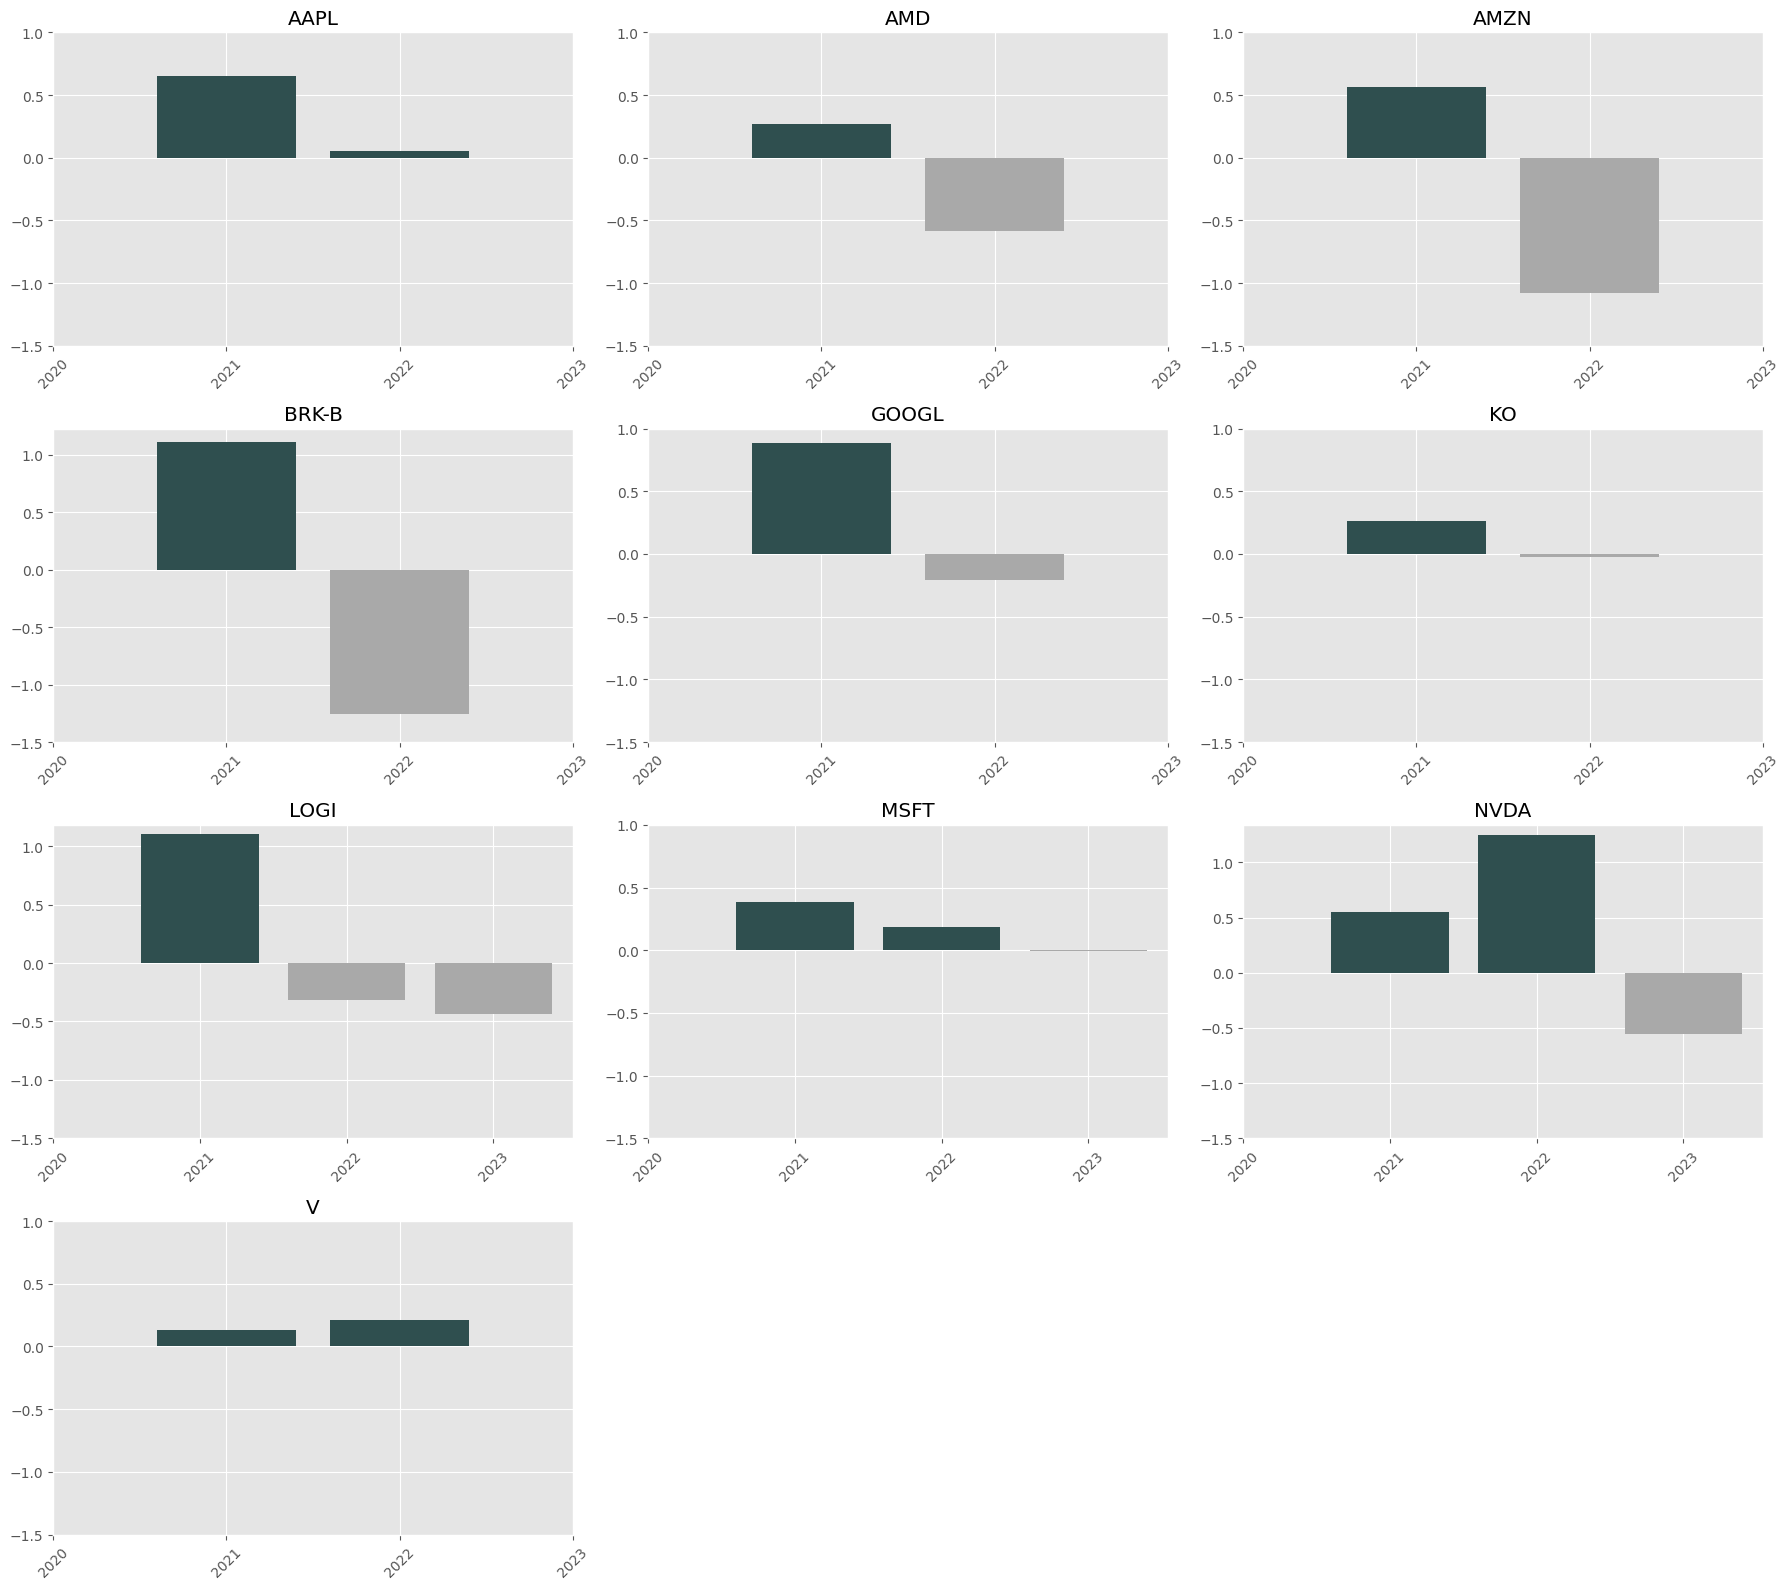

In [112]:
eps_pct_change(wony, stocks_portfolio, 2020, 2023, np.arange(-1.5, 1.5, 0.5))

### Dividends

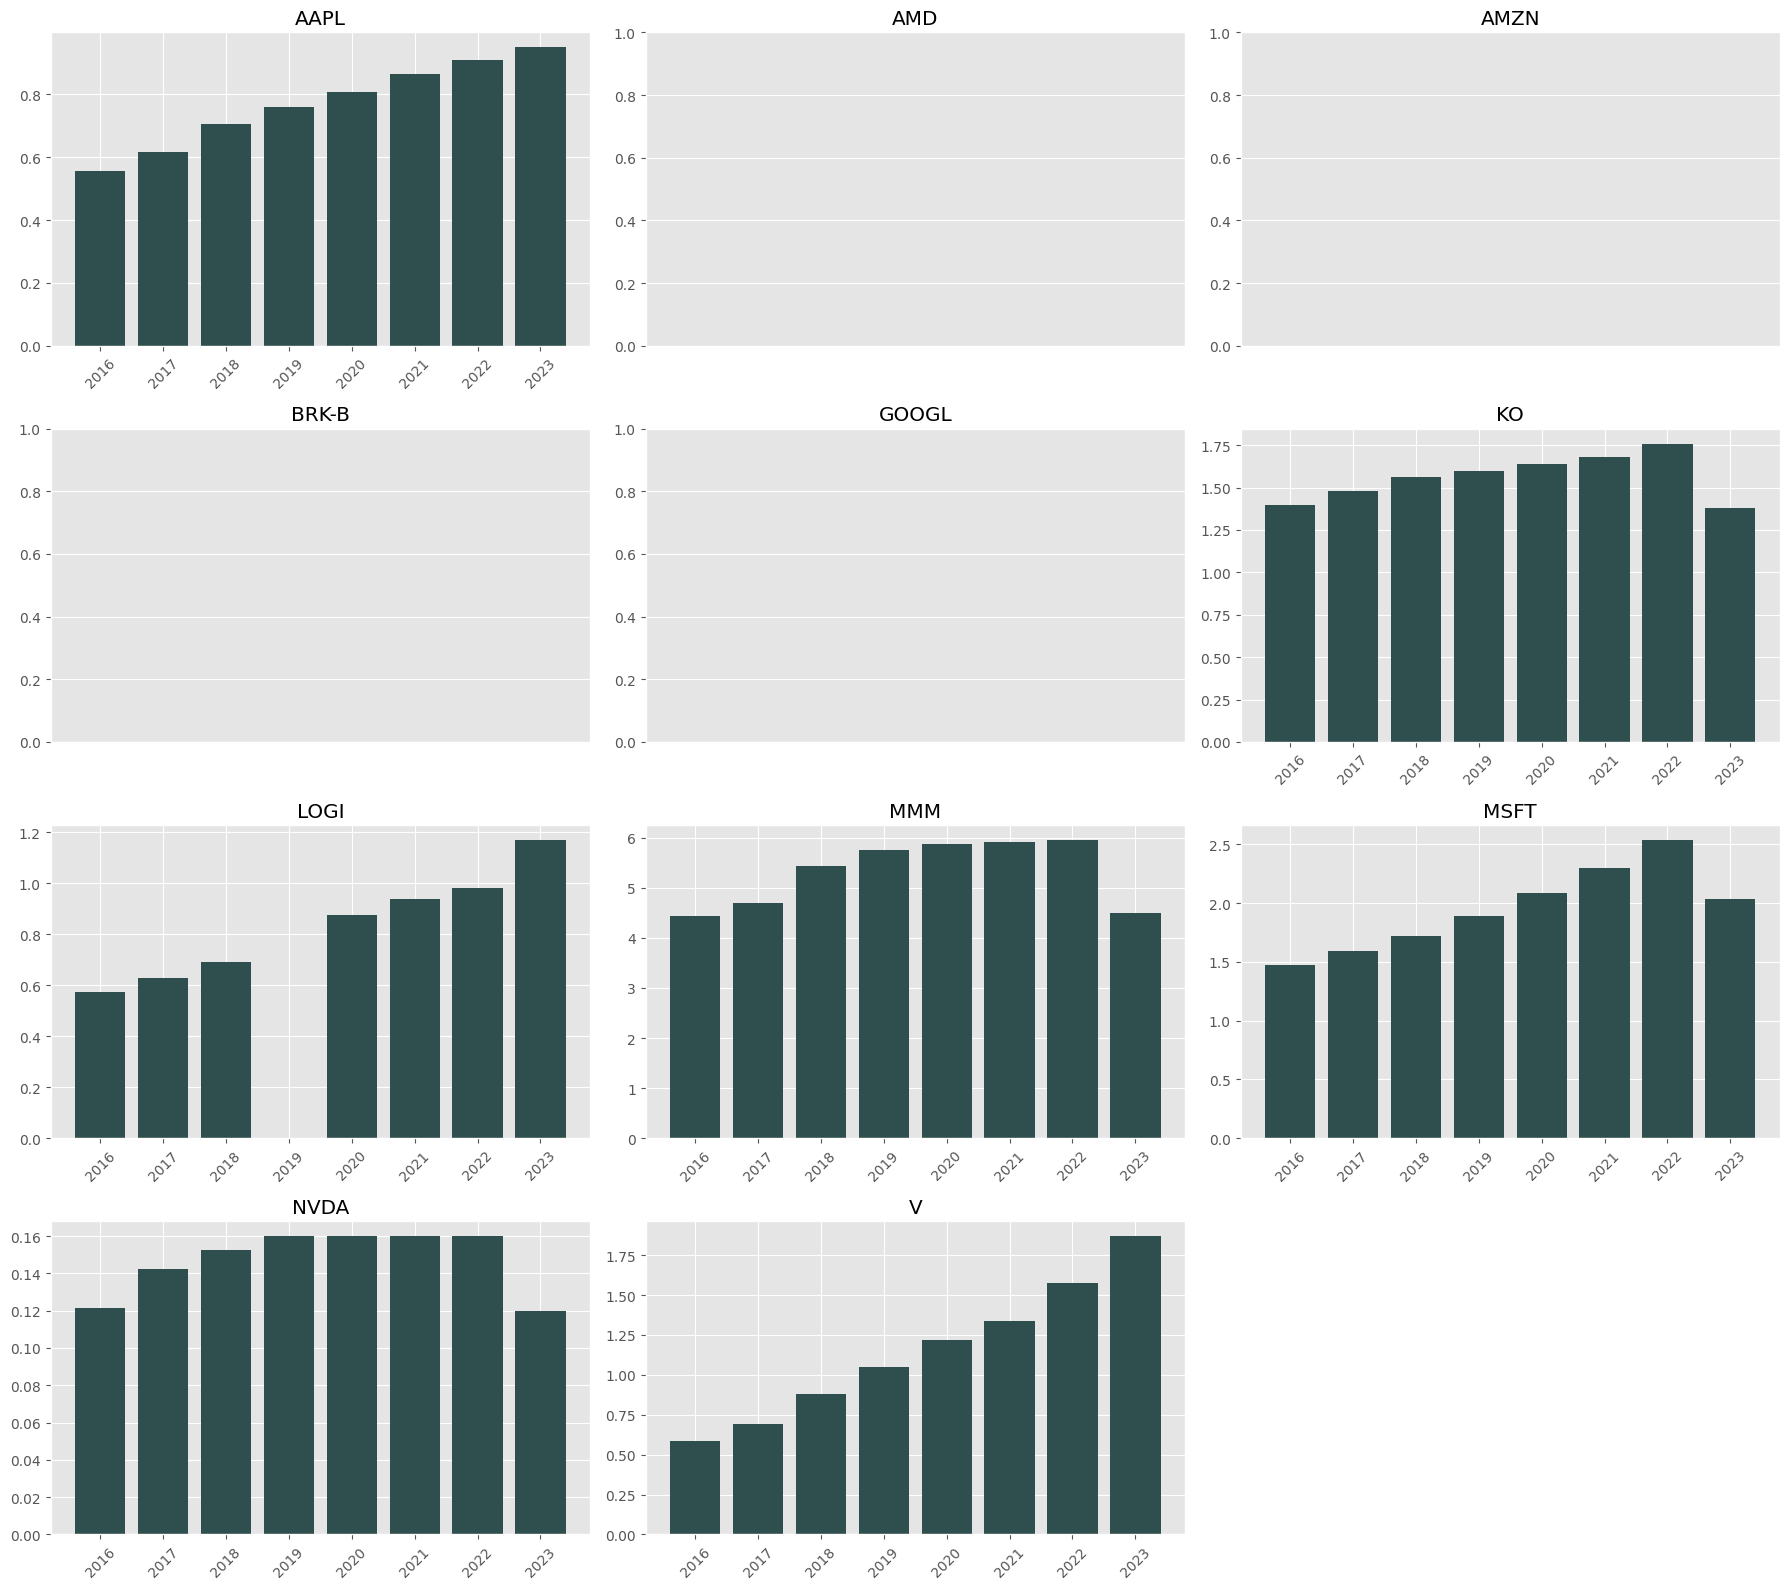

In [6]:
# Dividends
dividends(wony, stocks_portfolio, 2016, 2023)

### Price

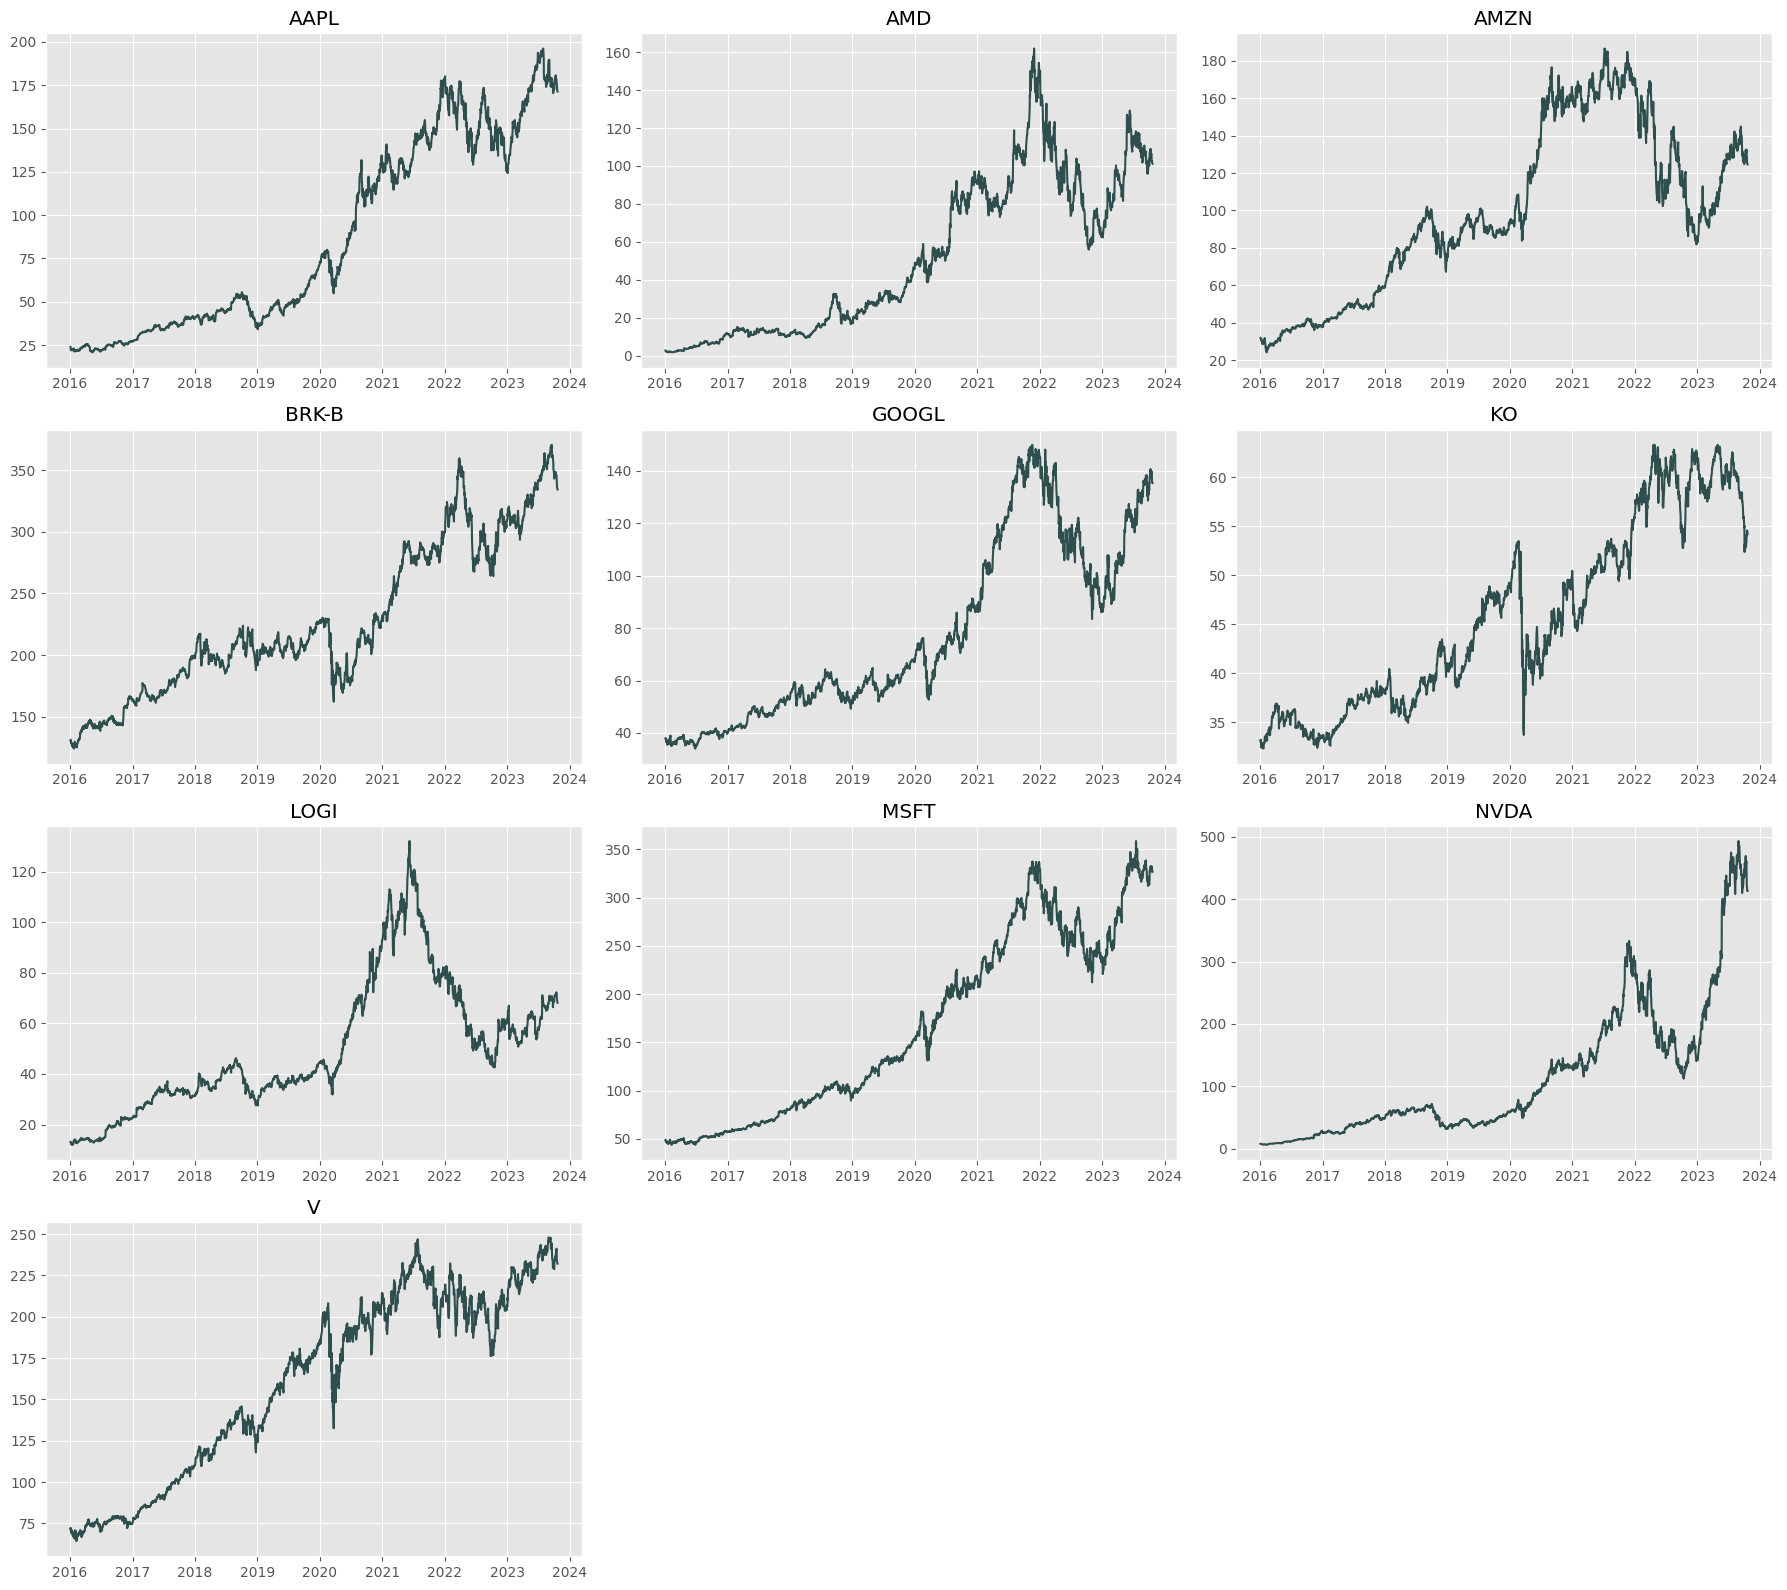

In [22]:
## Historical Price
historical_price(wony, stocks_history, 2016, 2023)

<BarContainer object of 0 artists>

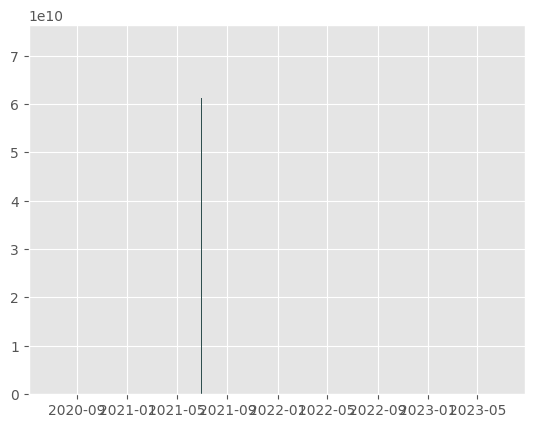

In [90]:
tickers = ['MSFT', 'V']

stocks_portfolio = {}

for ticker in tickers:
  stocks_portfolio[ticker] = yf.Ticker(ticker)

#@title 연간 이익 함수 코드
data = stocks_portfolio
start = 2016
end = 2023

ticker = tickers[0]
df = data[ticker.upper()].get_financials().T.sort_index()
df = df.loc[str(start):str(end)]
df.NetIncome

plt.bar(x=df[df.NetIncome > 0].index, height=df[df.NetIncome > 0].NetIncome, color='darkslategray')
plt.bar(x=df[df.NetIncome < 0].index, height=df[df.NetIncome < 0].NetIncome, color='darkgray')

# plt.tight_layout()

# plt.show()

In [93]:
df.index

DatetimeIndex(['2020-06-30', '2021-06-30', '2022-06-30', '2023-06-30'], dtype='datetime64[ns]', freq=None)